In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Предобработка датасета

In [42]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
import pandas as pd
import numpy as np

data = pd.read_csv("Steel_industry_data.csv")

scaler = MinMaxScaler()
ohe = OneHotEncoder(sparse_output=False)

cat_features = ["WeekStatus", "Day_of_week", "Load_Type"]
numeric_features = list(set(data.columns) - set(cat_features) - set(["date", "Usage_kWh"]))

one_hot_df = pd.DataFrame(ohe.fit_transform(data[cat_features]), 
                          columns=ohe.get_feature_names_out(cat_features))

data = pd.concat([data.drop(columns=cat_features), one_hot_df], axis=1)

data[numeric_features] = scaler.fit_transform(data[numeric_features])
data.drop(columns=["date"], inplace=True)
X = data.drop(columns=["Usage_kWh"]).to_numpy()
y = data["Usage_kWh"].to_numpy().reshape(-1, 1)


In [43]:
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test = X[int(0.8 * len(X)):]
y_test = y[int(0.8 * len(y)):]

In [44]:
window_size = 5
X_train_new = []
y_train_new = []
for row in range(window_size, X_train.shape[0]):
    X_train_new.append(X_train[row - window_size:row])
    y_train_new.append(y_train[row])

X_train = np.asarray(X_train_new)
y_train = np.asarray(y_train_new).flatten()

# RNN

In [79]:
from nn.rnn_model import SequenceRNN
from nn.losses.mse import MSE
import numpy as np

n_in = 18
n_out = 1
n_hidden = 64
model = SequenceRNN(n_inputs=n_in, n_hidden=n_hidden, n_outputs=n_out, time_steps=5)

# Dummy data
# X = np.random.randn(64, 5, n_in)     # (batch, time, features)
# y = np.random.randint(0, n_out, size=64)  # one-hot labels (batch, n_out)

loss = MSE()
history = model.train(X_train, y_train, X_test, y_test, epochs=10, batch_size=16, learning_rate=1e-3, loss_fn=loss)

  0%|          | 0/1751.6875 [00:00<?, ?it/s]

100%|█████████▉| 1745/1751.6875 [00:13<00:00, 120.91it/s]d:\vscode\Учеба\FOSII\venv\Lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1752/1751.6875 [00:13<00:00, 127.49it/s]


Epoch 1/10 - loss: 114.6912 - val_loss: 593.7638


100%|██████████| 1752/1751.6875 [00:12<00:00, 145.17it/s]


Epoch 2/10 - loss: 103.1946 - val_loss: 840.8910


100%|██████████| 1752/1751.6875 [00:11<00:00, 148.86it/s]


Epoch 3/10 - loss: 101.1234 - val_loss: 722.9071


100%|██████████| 1752/1751.6875 [00:12<00:00, 134.82it/s]


Epoch 4/10 - loss: 99.6996 - val_loss: 698.5079


100%|██████████| 1752/1751.6875 [00:13<00:00, 129.80it/s]


Epoch 5/10 - loss: 99.4419 - val_loss: 720.8118


100%|██████████| 1752/1751.6875 [00:12<00:00, 138.09it/s]


Epoch 6/10 - loss: 99.6687 - val_loss: 666.9705


100%|██████████| 1752/1751.6875 [00:11<00:00, 150.95it/s]


Epoch 7/10 - loss: 98.5608 - val_loss: 724.0675


100%|██████████| 1752/1751.6875 [00:11<00:00, 151.23it/s]


Epoch 8/10 - loss: 97.6610 - val_loss: 690.9249


100%|██████████| 1752/1751.6875 [00:11<00:00, 153.75it/s]


Epoch 9/10 - loss: 97.3757 - val_loss: 669.1723


100%|██████████| 1752/1751.6875 [00:11<00:00, 151.75it/s]

Epoch 10/10 - loss: 97.5702 - val_loss: 718.8224


In [80]:
predictions = []
for elem in X_train:
    predictions.append(model.forward(elem))

In [81]:
np.mean((np.array(predictions).flatten() - y_train)**2)

np.float64(196.1529968913404)

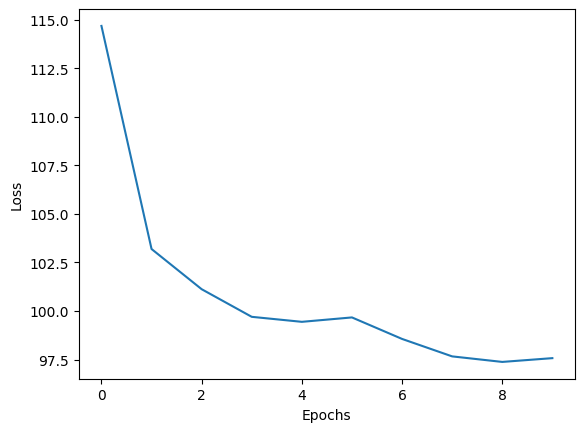

In [82]:
import matplotlib.pyplot as plt
plt.plot(history['train_loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()